# Lesson 1

## Q1: Machine precision

When talking about floating point, we discussed _machine epsilon_, $\epsilon$&mdash;this is the smallest number that when added to 1 is still different from 1.

We'll compute $\epsilon$ here:

  * Pick an initial guess for $\epsilon$ of `eps = 1`.  

  * Create a loop that checks whether `1 + eps` is different from `1`
  
  * Each loop iteration, cut the value of `eps` in half
  
What value of $\epsilon$ do you find?



In [1]:
eps = 1

while 1+eps!=1:
    eps=eps/2

print(eps)

1.1102230246251565e-16


## Q2: Iterations

### Part 1

To iterate over the tuples, where the _i_-th tuple contains the _i_-th elements of certain sequences, we can use `zip(*sequences)` function.

We will iterate over two lists, `names` and `age`, and print out the resulting tuples.

  * Start by initializing lists `names = ["Mary", "John", "Sarah"]` and `age = [21, 56, 98]`.
  
  * Iterate over the tuples containing a name and an age, the `zip(list1, list2)` function might be useful here.
  
  * Print out formatted strings of the type "*NAME is AGE years old*".
  

### Part 2

The function `enumerate(sequence)` returns tuples containing indices of objects in the sequence, and the objects. 

The `random` module provides tools for working with the random numbers. In particular, `random.randint(start, end)` generates a random number not smaller than `start`, and not bigger than `end`.

  * Generate a list of 10 random numbers from 0 to 9.
  
  * Using the `enumerate(random_list)` function, iterate over the tuples of random numbers and their indices, and print out *"Match: NUMBER and INDEX"* if the random number and its index in the list match.

### Part 1

In [2]:
#initialize lists
names = ["Mary", "John", "Sarah"]

age = ["21", "56", "98"]

In [3]:
#print out formatted strings of the type "NAME is AGE years old"
for x,y in zip(names, age):
    print(x+' is '+y+' years old')

Mary is 21 years old
John is 56 years old
Sarah is 98 years old


### Part 2

In [10]:
import random

#try the function enumerate
for n, a in enumerate(names):
    print(n, a)
    
    
#first way
a = []
for n in range(10):
    a.append(random.randint(0,10)) 
    
print(a)


#second way using list comprehensions
b = [random.randint(0,10) for x in range(10)]

print(b)


for n, x in enumerate(b):
    if n==x:
        print(f"Match: {x} and {n}")

0 Mary
1 John
2 Sarah
[9, 7, 7, 6, 6, 8, 8, 10, 2, 8]
[2, 6, 8, 7, 3, 10, 10, 7, 0, 0]
Match: 7 and 7


## Q13: Calendar events

We want to keep a schedule of events.  We will do this by creating a class called `Day`.  It is sketched out below.  A `Day` holds a list of events and has methods that allow you to add an delete events.  Our events will be instances of a class `Event`, which holds the time, location, and description of the event.

Finally, we can keep track of a list of all the `Day`s for which we have events to make our schedule.

Fill in these classes and write some code to demonstrate their use:

  * Create a full week of days in your calendar
  * Add an event every day at noon called "lunch"
  * Randomly add some other events to fill out your calendar
  * Write some code that tells you the start time of your first meeting and the end time of your last meeting (this is the length of your work day)

In [11]:
class Day:
    
    """a single day keeping track of the events scheduled"""
    def __init__(self, month, day, year):
        # store the month, day, and year as data in the class
        self.month = month
        self.day = day
        self.year = year
        
        # keep track of the events
        self.events = []
    
    
    def add_event(self, name, time=None, location=None):
        event = Event(name, time, location)
        for fixevent in self.events:
            if (fixevent.name == event.name) & (fixevent.time == event.time) & (fixevent.location == event.location):
                print('This event already exist')
                break
        else:    
            self.events.append(event)
            print('Event added successfully.')
    
    def delete_event(self, name):
        self.events = [event for event in self.events if event.name != name]
        
    
    
class Event:
    """a single event in our calendar"""
    def __init__(self, name, time=9, location=None, duration=1):
        self.name = name
        self.time = time
        self.location = location
        self.duration = duration

In [12]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create a full week of days
week = []
for day_of_week in range(7):
    # Assume the current date is January 1, 2024
    day = Day(month=1, day=0 + day_of_week, year=2024)
    week.append(day)

In [26]:
import random
name_events = ['gym', 'going out with friends', 'workshop online', 'volunteer event']

for day in week:
    day.add_event('lunch', 12)
    day.add_event('dinner', 20)
    day.add_event('breakfast', 7)
    day.add_event(name_events[random.randint(0,len(name_events)-1)], random.randint(8,24))
    if (day.day != 0) & (day.day != 6):
        #random meetings per day (maximum of 4)
        for n in range(4):
            day.add_event('meeting', random.randint(8,18))
    

    print()

Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.

Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.

Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.

Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
This event already exist
Event added successfully.

Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
Event added successfully.
This event already exist

Event added successfully.
Event added successfully.
Event add

In [29]:
for day in week:
    time = []
    for event in day.events:
        if event.name == 'meeting':
            time.append(event.time)

    if not time:
        print(f'{week_days[day.day]}: no meeting')
    else:
        maxT = max(time)
        minT = min(time)
        workday = maxT-minT
        print(f'{week_days[day.day]}: first meeting at {minT} and last meeting at {maxT} \nNumber of working hours: {workday} hr')
    print()
    

Sunday: no meeting

Monday: first meeting at 10 and last meeting at 18 
Number of working hours: 8 hr

Tuesday: first meeting at 10 and last meeting at 18 
Number of working hours: 8 hr

Wednesday: first meeting at 9 and last meeting at 18 
Number of working hours: 9 hr

Thursday: first meeting at 8 and last meeting at 17 
Number of working hours: 9 hr

Friday: first meeting at 8 and last meeting at 17 
Number of working hours: 9 hr

Saturday: no meeting



# Lesson 2

## Q1: Fun with arrays

**A.**  Create the array: 
```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```
with out explicitly typing it in.

Now create a new array containing only its 2nd and 4th rows.


**B.** Create a 2d array with `1` on the border and `0` on the inside, e.g., like:
```
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
```

Do this using array slice notation to let it work for an arbitrary-sized array

In [13]:
import numpy as np

#create the array
a = np.arange(1, 16)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [17]:
#reshape the array
b = a.reshape(3,5).T
b

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

In [18]:
#only 2nd and 4th rows
newArray = b[[1,3]]
newArray

array([[ 2,  7, 12],
       [ 4,  9, 14]])

In [19]:
#Create a 2d array with 1 on the border and 0 on the inside
nc = 5
nr = 7

m = np.ones(shape=(nr,nc), dtype='int')
m

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [20]:
#select all the rows from 1:-1 and all the columns from 1:-1 and put 0
m[1:-1, 1:-1] = 0
m

array([[1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1]])

## Q3: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

The standard deviation of the array is: 86.60 (with numpy 86.60)

The time elapsed with my function: 0.00026702880859375 s
The time elapsed with numpy function: 0.0003352165222167969 s


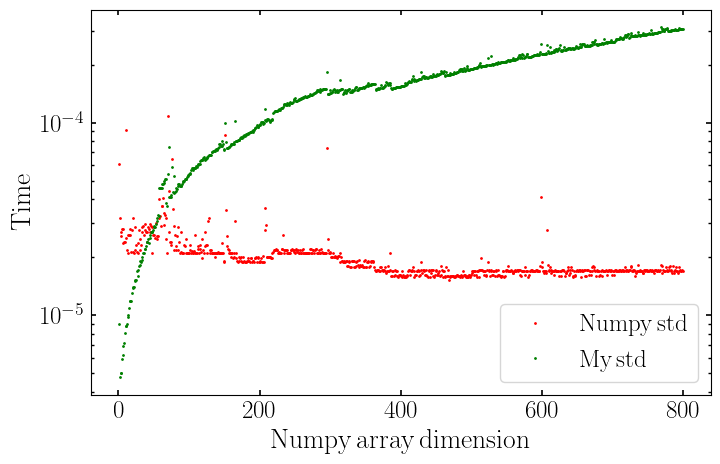

In [104]:
import numpy as np 
#time as a function of the array dimension
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import time

mp.rc('text', usetex=True)
mp.rcParams['axes.labelsize']  = 20
mp.rcParams['axes.titlesize']  = 20
mp.rcParams['xtick.labelsize'] = 18
mp.rcParams['ytick.labelsize'] = 18



a = np.arange(300)

#define mean function
def mean(a):
    s=0
    for x in a:
        s+=x
    m = s/a.size
    return m


#define standard deviation function
def std(a):
    s=0
    m = mean(a)
    for x in a:
        s+=(x-m)**2
    
    std = (s/a.size)**(1/2)
    return std





#evaluate time with my function
myt0 = time.time()
mystand = std(a)
myt1 = time.time()




#evaluate with numpy function
t0 = time.time()
stand = np.std(a)
t1 = time.time()

print(f'The standard deviation of the array is: {mystand:.2f} (with numpy {stand:.2f})')
print()
print(f'The time elapsed with my function: {myt1-myt0} s')
print(f'The time elapsed with numpy function: {t1-t0} s')





ind = np.arange(1,800)


#Create a figure with a single axes
fig, ax = plt.subplots(figsize=(8,5)) 

tnp = []
tmy = []
for xx in ind:
    a = np.arange(xx)
    
    t0my = time.time()
    standmy = std(a)
    t1my = time.time()
    tmy.append(t1my-t0my)
    
    t0 = time.time()
    stand = np.std(a)
    t1 = time.time()
    tnp.append(t1-t0)
    
    
ax.plot(ind, tnp, 'o', color = 'red', markersize=1, label=r'$ \rm Numpy \, std$')
ax.plot(ind, tmy, 'o',  color = 'green', markersize=1, label=r'$\rm My \, std$')

ax.tick_params(axis='both', which='major', width=1.2, length=3.5, labelsize= 18, direction='in') 
ax.tick_params(axis="both", which='minor', width=1.00, length=2, labelsize=18, direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_xlabel(r'$\rm Numpy \, array \,dimension$')
ax.set_ylabel(r'$\rm Time$')
ax.set_yscale('log')
ax.legend(loc='lower right', fontsize=18)
fig.savefig('Images/Ex3_lesson2.pdf')

# Lesson 3

## Q5: Subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplots()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


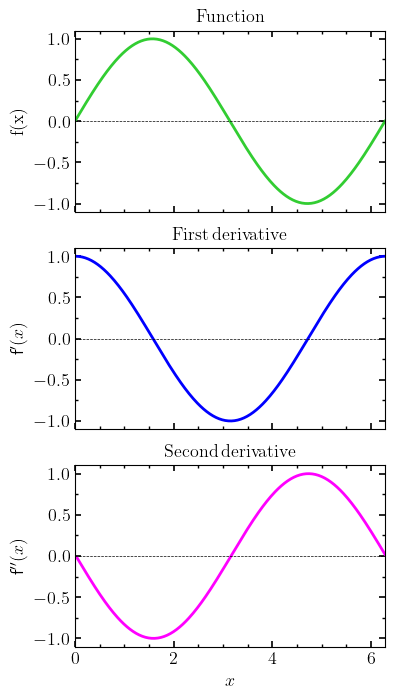

In [2]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

mp.rc('text', usetex=True)
mp.rcParams['axes.labelsize']  = 20
mp.rcParams['axes.titlesize']  = 20
mp.rcParams['xtick.labelsize'] = 18
mp.rcParams['ytick.labelsize'] = 18


#define a function
def f(x):
    return np.sin(x)


#define the derivative
def fprime(x,y):
    dx = x[1]-x[0]
    dfdx = (y[1:]-y[:-1])/dx
    return dfdx


x=np.linspace(0, 2*np.pi, 300)
y = f(x)
fp = fprime(x,y)
fs = fprime(x,fp)


fig, axs = plt.subplots(3,1, figsize=(4,8), sharex=True)

title = [r'$ \rm Function$', r'$\rm First \, derivative$', r'$ \rm Second \,derivative$']
ylabel = [r'$ \rm f(x)$', r'f$^{\prime}(x)$', r'f$^{\prime\prime}(x)$']
color = ['limegreen', 'blue', 'magenta']

ploty = np.array([y, fp, fs], dtype='object')                  

for ii in range(3):
    axs[ii].plot(x[ii:],ploty[ii], color=color[ii], lw=2)
    axs[ii].set_title(title[ii], fontsize=13)
    axs[ii].set_ylabel(ylabel[ii], fontsize=13)
    axs[ii].axhline(0,color='black', ls='dashed', lw=0.5)
    
    axs[ii].yaxis.set_ticks_position('both') 
    axs[ii].xaxis.set_ticks_position('both')
    axs[ii].tick_params(axis="both", which='major', width=1.2, length=4, labelsize= 13, direction='in')   
    axs[ii].tick_params(axis="both", which='minor', width=1.00, length=2, labelsize=13, direction='in')
    axs[ii].xaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[ii].yaxis.set_minor_locator(MultipleLocator(0.25)) 

axs[2].set_xlabel(r'$x$', fontsize=13)
axs[2].set_xlim(0, 2*np.pi)  
    
plt.savefig('Images/Ex5_lesson3.pdf', bbox_inches='tight')    

## Q7: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


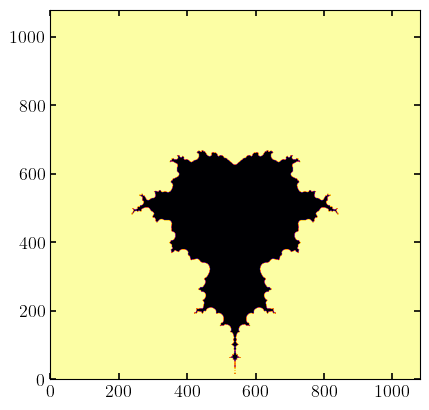

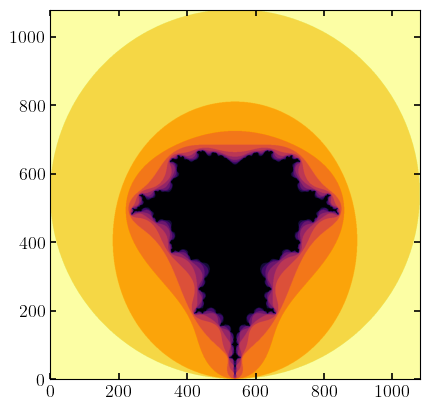

In [5]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

mp.rc('text', usetex=True)
mp.rcParams['axes.labelsize']  = 20
mp.rcParams['axes.titlesize']  = 20
mp.rcParams['xtick.labelsize'] = 18
mp.rcParams['ytick.labelsize'] = 18

N = 1080
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")


c = xv + 1j*y

z = np.zeros((N, N), dtype=np.complex128)

for i in range(10):
    z = z**2 + c
    
m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0


fig, ax = plt.subplots()
ax.imshow(m, origin='lower', cmap='inferno')
ax.yaxis.set_ticks_position('both') 
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis="both", which='major', width=1.2, length=4, labelsize= 13, direction='in')   
ax.tick_params(axis="both", which='minor', width=1.00, length=2, labelsize=13, direction='in')
plt.savefig('Images/Ex7_pt1_lesson3.pdf', bbox_inches='tight')   



N = 1080
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")

c = xv + 1j*y

z = np.zeros((N, N), dtype=np.complex128)
iterations = np.zeros((N, N))

for i in range(10):
    z = z**2 + c
    
    #save where abs(z) is >=2
    mask = np.abs(z) >= 2
    
    #update the iterations matrix
    #0 + boolean counts how many times is True -> from which iteration becomes >=2
    iterations += mask

fig, ax = plt.subplots()
ax.imshow(iterations, origin='lower', cmap='inferno')
ax.yaxis.set_ticks_position('both') 
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis="both", which='major', width=1.2, length=4, labelsize= 13, direction='in')   
ax.tick_params(axis="both", which='minor', width=1.00, length=2, labelsize=13, direction='in')
plt.savefig('Images/Ex7_pt2_lesson3.pdf', bbox_inches='tight') 

# Lesson 4

## Q5: Planetary orbits

We want to consider planetary orbits.  To do this, we need to solve Newton's second law together with Newton's law of gravity.  If we restrict ourselves to the x-y plane, then there are 4 quantities we need to solve for: $x$, $y$, $v_x$, and $v_y$.  These evolve according to:

\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}

To integrate these forward in time, we need an initial condition for each quantity.  We'll setup our system such that the Sun is at the origin (that will be one focus), and the planet begins at perihelion and orbits counterclockwise. 

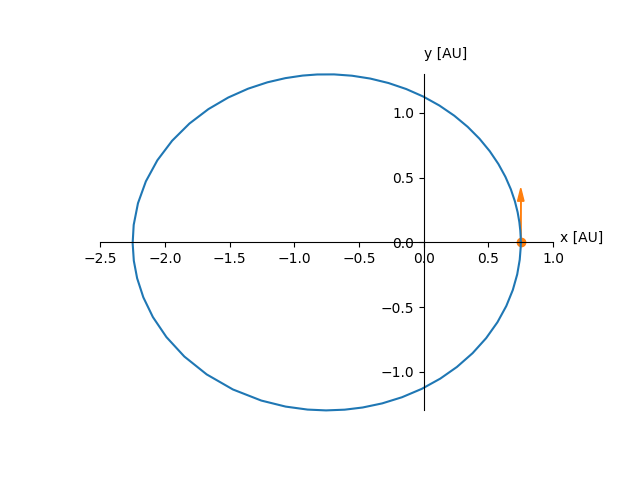

The distance of perihelion from the focus is:

$$r_p = a (1 - e)$$

where $a$ is the semi-major axis and $e$ is the eccentricity.  The perihelion velocity is all in the $y$ direction and is:

$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$

We'll work in units of AU, years, and solar masses, in which case, $GM_\star = 4\pi^2$ (for the Sun).  

Your initial conditions should be:

  * $x(t=0) = r_p$
  * $y(t=0) = 0$
  * $v_x(t=0) = 0$
  * $v_y(t=0) = v_p$

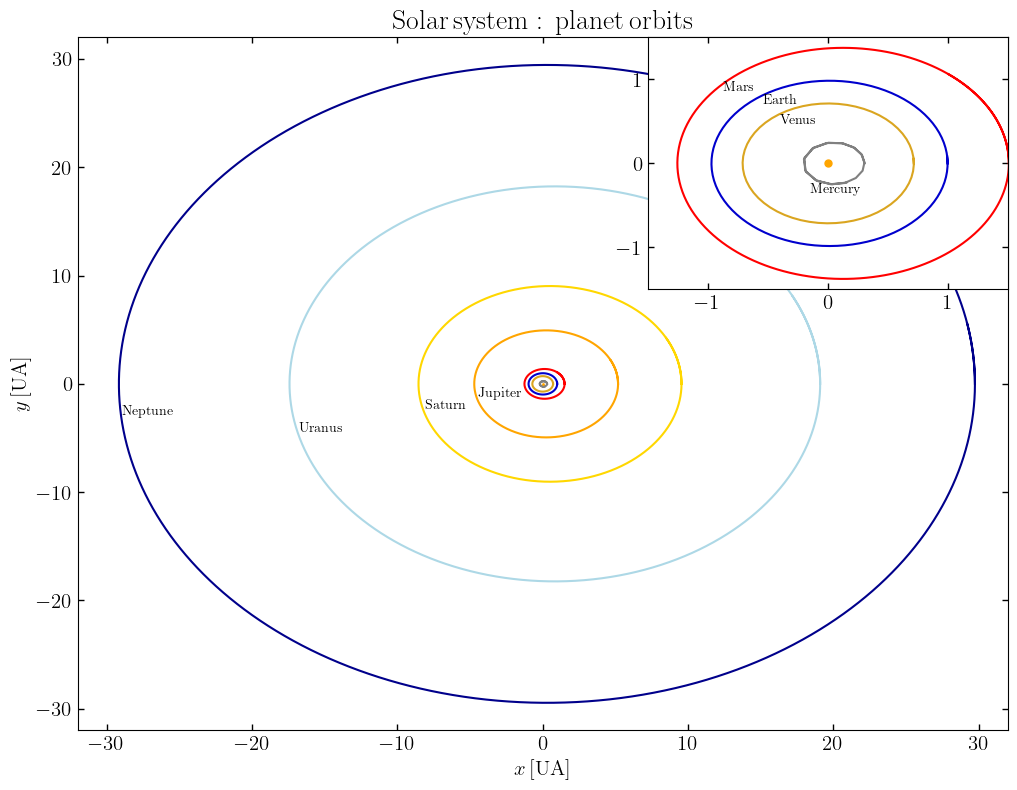

In [9]:
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

mp.rc('text', usetex=True)
mp.rcParams['axes.labelsize']  = 20
mp.rcParams['axes.titlesize']  = 20
mp.rcParams['xtick.labelsize'] = 18
mp.rcParams['ytick.labelsize'] = 18


#eccentrities and semimajor axis for all the planets
e = np.array([0.2056, 0.0067, 0.016, 0.0934, 0.049, 0.056, 0.046, 0.010])
a = np.array([0.387, 0.723, 1.016, 1.666, 5.458, 10.123, 20.02, 30.05])

#initial condition
X0 = np.array( [a*(1-e), np.zeros(8), np.zeros(8), np.sqrt(4*np.pi**2/a*(1+e)/(1+e))] )

tmax = np.array([0.24, 0.62, 1.0, 1.88, 11.86, 29.46, 84.01, 164.79])
dt = 0.01



def rhs(t, x):
    r = np.sqrt(x[0]**2+x[1]**2)
    xdot = x[2]
    ydot = x[3]
    vxdot = - 4*np.pi**2*x[0]/r**3
    vydot =  - 4*np.pi**2*x[1]/r**3
    return np.array([xdot, ydot, vxdot, vydot])

def ode_integrate(X0, dt, tmax):
    
    #evolve it from a time 0 to tmax
    r = integrate.solve_ivp(rhs, (0.0, tmax), X0, method="RK45", dense_output=True, rtol=1e-10, atol=1.e-10)

    #get the solution at intermediate times
    ts = np.arange(0.0, tmax, dt)
    
    Xs = r.sol(ts)
    
    return ts, Xs



time = []
X = []

for i in range(8):
    t, x = ode_integrate(X0[:,i], dt, tmax[i])
    time.append(t)
    X.append(x)



#-------------------------------- 
# Plot the orbits of the planets 
#-------------------------------- 
fig, ax = plt.subplots(figsize=(12,9))

#dictionary with planets and colors
planet_colors = {
    r'$\rm Mercury$': 'gray',
    r'$\rm Venus$': 'goldenrod',
    r'$\rm Earth$': 'mediumblue',
    r'$\rm Mars$': 'red',
    r'$\rm Jupiter$': 'orange',
    r'$\rm Saturn$': 'gold',
    r'$\rm Uranus$': 'lightblue',
    r'$\rm Neptune$': 'darkblue',
}

for planet, color in planet_colors.items():
    pindex = list(planet_colors.keys()).index(planet)
    ax.plot(X[pindex][0, :], X[pindex][1, :], color=color, label=planet, ls='solid')
    if pindex>=4:
        ax.text(X[pindex][0, int(len(time[pindex])/2)]+0.1, X[pindex][1, int(len(time[pindex])/2)], planet)

ax.plot(0,0, 'o', markersize=1, color='orange')
ax.tick_params(axis="both", which='major', width=1, length=4, labelsize= 15, direction='in')  
ax.xaxis.set_major_locator(MultipleLocator(10)) 
ax.yaxis.set_major_locator(MultipleLocator(10)) 
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_title(r'$\rm Solar\,system:\,planet\,orbits$')
ax.set_xlabel(r'$x \rm \, [UA]$', fontsize = 15)
ax.set_ylabel(r'$y \rm \, [UA]$', fontsize = 15)
ax.set_xlim(-32,32)
ax.set_ylim(-32,32)

inset_axes = plt.axes([0.6, 0.6, 0.3, 0.28])

for planet, color in planet_colors.items():
    pindex = list(planet_colors.keys()).index(planet)
    if pindex<=3:
        inset_axes.plot(X[pindex][0, :], X[pindex][1, :], color=color, label=planet, ls='solid')
        inset_axes.text(X[pindex][0, int(len(time[pindex])/3)]-0.05, X[pindex][1, int(len(time[pindex])/3)]-0.15, planet)

inset_axes.plot(0,0, 'o', markersize=5, color='orange')
inset_axes.set_xlim(-1.5,1.5)
inset_axes.set_ylim(-1.5,1.5)
inset_axes.tick_params(axis="both", which='major', width=1, length=4, labelsize= 15, direction='in')  
inset_axes.xaxis.set_major_locator(MultipleLocator(1)) 
inset_axes.yaxis.set_major_locator(MultipleLocator(1)) 
inset_axes.yaxis.set_ticks_position('both')
inset_axes.xaxis.set_ticks_position('both')

plt.savefig('Images/Ex5_lesson4.pdf', bbox_inches='tight') 

## Q7: Noisy signal

A convolution is defined as:  

  \begin{equation}                                                                           
    (f \star g)(t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau                   
  \end{equation}                                                                             

  It is easy to compute this with FFTs, via the _convolution theorem_,                                                                        
  \begin{equation}                                         
    \mathcal{F}\{f \star g\} = \mathcal{F}\{f\} \, \mathcal{F}\{g\}                                          
  \end{equation}                                         
  That is: the Fourier transform of the convolution of $f$ and $g$ is simply
  the product of the individual transforms of $f$ and $g$.  This allows us
  to compute the convolution via multiplication in Fourier space and then take
  the inverse transform, $\mathcal{F}^{-1}\{\}$, to recover the convolution in real space:
  
  \begin{equation}
  f \star g = \mathcal{F}^{-1}\{ \mathcal{F}\{f\} \, \mathcal{F}\{g\}\}
  \end{equation}
  
A common use of a convolution is to smooth noisy data, for example by convolving noisy data with a Gaussian.  We'll do that here.

Here's some noisy data we'll work with

SciPy provides a convolution function `scipy.signal.convolve()` that can do the convolution for us directly.  To smooth the data, we want to use a Gaussian, which can be produced by `scipy.signal.gaussian()`.

Convolve the noisy data with a Gaussian and plot the result together with the original data `orig`.  You'll need to play with the width of the Gaussian to get a nice smoothing.  You also will need to normalize the Gaussian so that it sums to 1, otherwise, your convolved data will be shifted verfically from the original function.

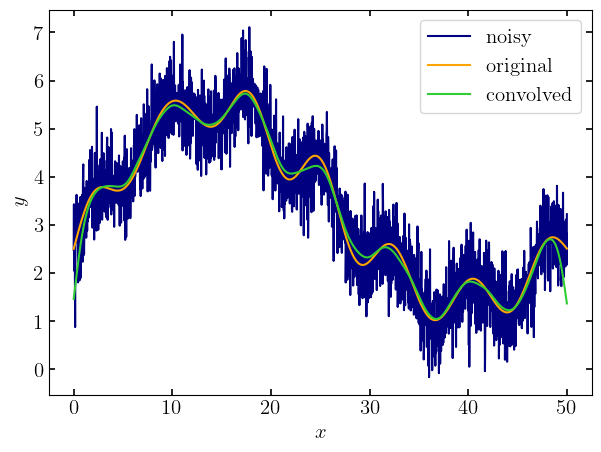

In [10]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mp

mp.rc('text', usetex=True)
mp.rcParams['axes.labelsize']  = 20
mp.rcParams['axes.titlesize']  = 20
mp.rcParams['xtick.labelsize'] = 18
mp.rcParams['ytick.labelsize'] = 18

def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)


sigma = 30
gauss = signal.windows.gaussian(N, sigma)*1/(np.sqrt(2*np.pi)*sigma)
convolution = signal.convolve(noisy, gauss, mode='same')


fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x, noisy, c='navy', label=r'$\rm noisy$')
ax.plot(x, orig, c='orange', label=r'$\rm original$')
ax.plot(x, convolution, c='limegreen', label=r'$\rm convolved$')
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
ax.yaxis.set_ticks_position('both') 
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis="both", which='major', width=1.2, length=4, labelsize= 15, direction='in')   
ax.tick_params(axis="both", which='minor', width=1.00, length=2, labelsize=15, direction='in')
ax.legend(fontsize=15)

plt.savefig('Images/Ex7_lesson4.pdf', bbox_inches='tight') 

# Lesson 6

## Q1: Your next research project.

Pick the directory of your current research project (your next paper!) and put it under version control.

I'm working on the MUSE Ultra Deep Field data set and I'm currently analysing the Lyman-Alpha emitters (LAEs) in the field. The directory is already under version control but is set to private.  
Below the MUDF/PythonCode directory:

![github_repository](github_repository.png)

Here the python files in the directory:
![github_LAE_codes.png](github_LAE_codes.png)

## Q4: You're wrong

Find a bug/typo in the material of this course, fix it, and send me a pull request.

# Lesson 7

## Q1: The stock market

(This is about numba)

A Markov Chain is defined as a sequence of random variables where a parameter depends *only* on the preceding value. This is a crucial tool in statistics, widely used in science and beyond (economics for instance).

For instance, the stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would be a Marov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

where the numbers on the arrows indicate the probabily that the next day will be in a given state.

Your task is to simulate the stock market according to this rule. Start from a random state and simulate many many  iterations. If your code is right, the fraction of days in each state should converge. 

Implement a pure-python version and a numba version, and compare speeds. 


The final fraction of days in bull state is: 0.627
The final fraction of days in bear state is: 0.315
The final fraction of days in stagnant state is: 0.059


Pure python implementation speed:
122 ms ± 1.27 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)
Numba implementation speed:
671 µs ± 26.2 µs per loop (mean ± std. dev. of 5 runs, 5 loops each)


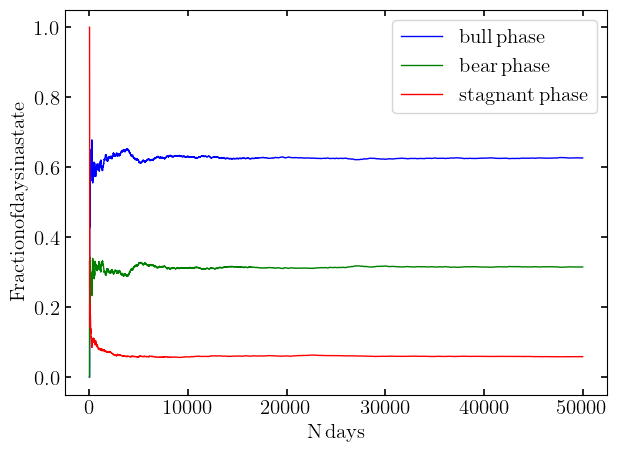

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import time
from numba import njit

mp.rc('text', usetex=True)
mp.rcParams['axes.labelsize']  = 20
mp.rcParams['axes.titlesize']  = 20
mp.rcParams['xtick.labelsize'] = 18
mp.rcParams['ytick.labelsize'] = 18


def evolve_market(inp_state, days):
    n_days = len(days)
    
    f_bull = np.zeros(n_days)
    f_bear = np.zeros(n_days)
    f_stagnant = np.zeros(n_days)
    
    bull_day = 0
    bear_day = 0
    stagnant_day = 0

    for i in range(n_days):
        x = days[i]
        n = np.random.uniform(0, 1)
        
        if inp_state == 'bull':
            if n < 0.9:
                out = 'bull'
            elif n < 0.975:
                out = 'bear'
            else:
                out = 'stagnant'
        elif inp_state == 'bear':
            if n < 0.8:
                out = 'bear'
            elif n < 0.85:
                out = 'stagnant'
            else:
                out = 'bull'
        elif inp_state == 'stagnant':
            if n < 0.5:
                out = 'stagnant'
            elif n < 0.75:
                out = 'bull'
            else:
                out = 'bear'  
        
        inp_state = out
        
        if inp_state == 'bull':
            bull_day += 1
        elif inp_state == 'bear':
            bear_day += 1
        else:
            stagnant_day += 1

        f_bull[i] = bull_day / x
        f_bear[i] = bear_day / x
        f_stagnant[i] = stagnant_day / x

    return f_bull, f_bear, f_stagnant
        

#initialize the market
inp_state = 'stagnant'

#days
days = np.arange(1, int(5e4))

#-------------------------------
# Test the pure Python version
#-------------------------------
f_bull, f_bear, f_stagnant = evolve_market(inp_state, days)

print(f'The final fraction of days in bull state is: {np.round(f_bull[-1],3)}')
print(f'The final fraction of days in bear state is: {np.round(f_bear[-1],3)}')
print(f'The final fraction of days in stagnant state is: {np.round(f_stagnant[-1],3)}')

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(days, f_bull, color="blue", lw = 1, label=r"$\rm bull \, phase$")
ax.plot(days, f_bear, color="green", lw=1, label=r"$ \rm bear \, phase$")
ax.plot(days, f_stagnant, color="red", lw=1, label=r"$ \rm stagnant \, phase$")
ax.set_xlabel(r'$ \rm N \, days$', fontsize=15)
ax.set_ylabel(r'$\rm Fraction of days in a state$', fontsize=15)
ax.legend(fontsize=15)
ax.yaxis.set_ticks_position('both') 
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis="both", which='major', width=1.2, length=4, labelsize= 15, direction='in')   
ax.tick_params(axis="both", which='minor', width=1.00, length=2, labelsize=15, direction='in')

plt.savefig('Images/Ex1_lesson7.pdf', bbox_inches='tight')

#----------------------------------
# Test the Numba-optimized version
#----------------------------------
fast_evolve_market = njit(evolve_market)

print()
print()
print("Pure python implementation speed:")
%timeit -r 5 -n 5 evolve_market(inp_state, days)

print("Numba implementation speed:")
tmp = fast_evolve_market(inp_state, days) #temporary, to ignore
%timeit -r 5 -n 5 fast_evolve_market(inp_state, days)


## Q2: Consistent plotting

(This is about python's dectorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should intialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifill, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions. 
    
The decorator that I use for my papers is available in my python module [skywalker](https://github.com/dgerosa/skywalker).  

.. myplot decorator: creating Ex2_lesson7.pdf


(<Figure size 700x400 with 1 Axes>,
 <Axes: title={'center': '$ \\rm Example \\, plot $'}, xlabel='$\\rm x$', ylabel='$\\rm y$'>)

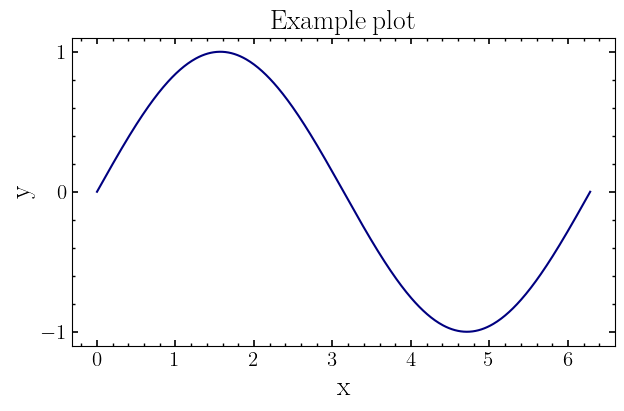

In [82]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, AutoLocator

def myplot(function):
    
    def wrapper(*args, **kwargs):
        
        print(f'.. myplot decorator: creating {function.__name__}.pdf')
        
        # Update the default rcParams 
        plt.rcParams.update({
            "text.usetex": True,
            "font.family": "Helvetica",
            "font.size": 10,
            "xtick.top": True,
            "ytick.right": True,
            "figure.figsize": (5, 5),
            "errorbar.capsize": 3,
            "savefig.format": "pdf"
        })
        
        # Execute the plotting function 
        fig, ax = function(*args, **kwargs)
        
        # Retrieve tick parameters from kwargs or use defaults
        major_x      = kwargs.get('major_x', 1)
        minor_x      = kwargs.get('minor_x', None)
        major_y      = kwargs.get('major_y', 1)
        minor_y      = kwargs.get('minor_y', None)
        major_width  = kwargs.get('major_width', 1.2)
        minor_width  = kwargs.get('minor_width', 1.0)
        major_length = kwargs.get('major_length', 4)
        minor_length = kwargs.get('minor_length', 2)
        label_size   = kwargs.get('label_size', 15)
        savepath     = kwargs.get('savepath', '')
        
        # Set the tick parameters
        ax.yaxis.set_ticks_position('both') 
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="both", which='major', width=major_width, length=major_length, labelsize=label_size, direction='in')   
        ax.tick_params(axis="both", which='minor', width=minor_width, length=minor_length, labelsize=label_size, direction='in')
        
        # Set the tick locators
        
        #--------
        # x axis
        #--------
        if major_x is not None:
            ax.xaxis.set_major_locator(MultipleLocator(major_x))
        else:
            ax.xaxis.set_major_locator(AutoLocator())
            
        if minor_x is not None:
            ax.xaxis.set_minor_locator(MultipleLocator(minor_x))
        else:
            ax.xaxis.set_minor_locator(AutoMinorLocator())
        
        #--------
        # y axis
        #--------
        if major_y is not None:
            ax.yaxis.set_major_locator(MultipleLocator(major_y))
        else:
            ax.yaxis.set_major_locator(AutoLocator())
            
        if minor_y is not None:
            ax.yaxis.set_minor_locator(MultipleLocator(minor_y))
        else:
            ax.yaxis.set_minor_locator(AutoMinorLocator())
            
        
        # Save the figure
        fig.savefig(f'{savepath}{function.__name__}.pdf', bbox_inches='tight')
        
        # Optionally return the figure or any other results
        return fig, ax

    return wrapper

@myplot
def Ex2_lesson7(**kwargs):
    # Sample plotting function
    x = np.linspace(0, 2*np.pi, 500)
    y = np.sin(x)
    
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.set_title(r'$ \rm Example \, plot $')
    ax.plot(x, y, c='navy')
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    
    return fig, ax

# Example usage with default parameters
Ex2_lesson7(savepath='Images/')

# Lesson 8

## Q1: I love pip 

- Take a piece of python code you wrote (for instance pick one of the exercises you've done for this class). 
- Turn it into a module
- Install it locally
- Deploy on pypi (only using the test-pypi server!)

<div class="alert alert-block alert-warning">
<span class="fa fa-flash"></span> VERY IMPORTANT
    
Both the pypi and test-pypi server are public on the web! Don't compromise your research by putting up something your competitors can use and steal your idea before you've published a paper on it!!! 

</div>






I take the planet_orbits.py from L04 and I turn it in a module and installed it locally to create the figure.